## VN30F1M 1m timeframe - volume profile

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

In [2]:
USER_AGENTS = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36"
]

HEADERS = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
VNDIRECT_DATA_HISTORY_URL = 'https://dchart-api.vndirect.com.vn/dchart/history'
URL = VNDIRECT_DATA_HISTORY_URL

In [3]:
def getStockHistoryData(ticker, timestamp_from=0, timestamp_to=0):
    if timestamp_from == 0:
        three_months = date.today() + relativedelta(months=-3)
        timestamp_from = datetime.strptime(three_months.strftime("%m/%d/%Y") + ', 00:00:0', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()
    if timestamp_to == 0:
        timestamp_to = datetime.strptime(date.today().strftime("%m/%d/%Y") + ', 23:59:00', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()

    params = {
        "resolution": "1",
        "symbol": str(ticker),
        "from": int(timestamp_from),
        "to": int(timestamp_to)
    }

    x = requests.get(URL, params=params, headers=HEADERS)
    response = x.json()

    import numpy as np
    import pandas as pd

    timestamp = np.array(response['t']).astype(int)
    close = np.array(response['c']).astype(float)
    open = np.array(response['o']).astype(float)
    high = np.array(response['h']).astype(float)
    low = np.array(response['l']).astype(float)
    volume = np.array(response['v']).astype(int)

    dataset = pd.DataFrame({'Time': timestamp, 'Open': list(open), 'High': list(high), 'Low': list(low),
                            'Close': list(close), 'Volume': list(volume)},
                           columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return dataset

In [4]:
def prepareData(htd):
    if 'Time' in htd.columns:
        from datetime import datetime

        htd['DateStr'] = htd.apply(
            lambda x: datetime.fromtimestamp(x['Time']).strftime("%Y-%m-%d %H:%M:%S"), axis=1)

    htd['Date'] = pd.to_datetime(htd['DateStr'])
    # htd['Date'] = htd['Date'] + pd.DateOffset(hours=7)
    ticker_data = htd.set_index('Date')
    ticker_data.drop(columns=['Time', 'DateStr'], inplace=True)
    return ticker_data

In [5]:
ticker = "VN30F1M"
htd = getStockHistoryData(ticker, 0, 0)
data = prepareData(htd)
data = data.dropna()
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-10 09:00:00,1313.0,1314.0,1312.3,1312.3,4266
2024-06-10 09:01:00,1312.1,1312.2,1311.2,1311.5,1622
2024-06-10 09:02:00,1311.4,1311.5,1310.7,1310.7,998
2024-06-10 09:03:00,1310.7,1311.3,1310.5,1311.3,911
2024-06-10 09:04:00,1311.2,1311.8,1311.2,1311.5,397
...,...,...,...,...,...
2024-09-06 14:27:00,1310.2,1310.3,1309.2,1309.6,1376
2024-09-06 14:28:00,1309.6,1309.8,1309.0,1309.1,1614
2024-09-06 14:29:00,1308.8,1309.3,1308.8,1308.8,2076


In [6]:
# Tinh tu ngay dao han phai sinh thang truoc
data = data[data.index > '2024-08-16 23:00:00']
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-19 09:00:00,1289.0,1289.9,1288.3,1289.6,2594
2024-08-19 09:01:00,1289.6,1290.4,1289.6,1289.7,1117
2024-08-19 09:02:00,1289.5,1290.0,1289.2,1289.3,737
2024-08-19 09:03:00,1289.2,1289.3,1289.0,1289.3,697
2024-08-19 09:04:00,1289.1,1289.7,1289.1,1289.3,415
...,...,...,...,...,...
2024-09-06 14:27:00,1310.2,1310.3,1309.2,1309.6,1376
2024-09-06 14:28:00,1309.6,1309.8,1309.0,1309.1,1614
2024-09-06 14:29:00,1308.8,1309.3,1308.8,1308.8,2076


In [7]:
data['price'] = data['Close'].round()

In [8]:
data

,Open,High,Low,Close,Volume,price
Date,,,,,,
2024-08-19 09:00:00,1289.0,1289.9,1288.3,1289.6,2594,1290.0
2024-08-19 09:01:00,1289.6,1290.4,1289.6,1289.7,1117,1290.0
2024-08-19 09:02:00,1289.5,1290.0,1289.2,1289.3,737,1289.0
2024-08-19 09:03:00,1289.2,1289.3,1289.0,1289.3,697,1289.0
2024-08-19 09:04:00,1289.1,1289.7,1289.1,1289.3,415,1289.0
...,...,...,...,...,...,...
2024-09-06 14:27:00,1310.2,1310.3,1309.2,1309.6,1376,1310.0
2024-09-06 14:28:00,1309.6,1309.8,1309.0,1309.1,1614,1309.0
2024-09-06 14:29:00,1308.8,1309.3,1308.8,1308.8,2076,1309.0


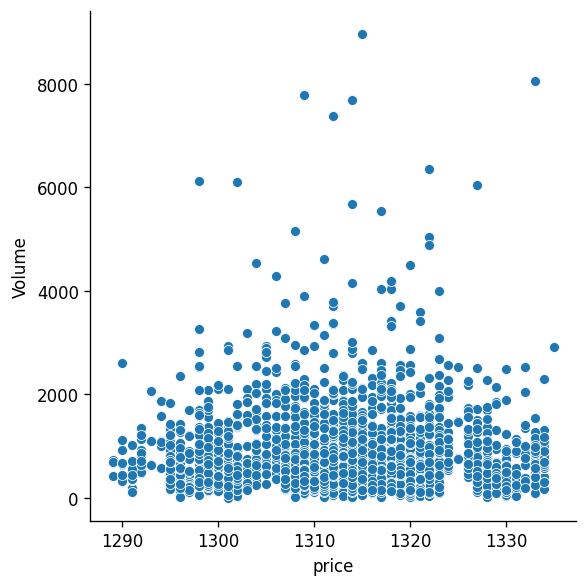

In [10]:
sns.relplot(data=data[['price', 'Volume']], x="price", y="Volume")

In [11]:
grpd = data.groupby('price')[['Volume']]
irs = grpd.sum().reset_index()
irs

,price,Volume
0,1289.0,1849
1,1290.0,8425
2,1291.0,7566
3,1292.0,9891
4,1293.0,3773
5,1294.0,7193
6,1295.0,23980
7,1296.0,40673
8,1297.0,13104
9,1298.0,57684


In [12]:
irs_volume_sort = irs.sort_values('Volume')
irs_top10 = irs_volume_sort.tail(10)

In [13]:
irs_top10

,price,Volume
21,1310.0,81735
19,1308.0,83880
26,1315.0,91423
33,1322.0,91831
31,1320.0,95089
28,1317.0,96411
29,1318.0,98893
24,1313.0,108653
23,1312.0,134555
25,1314.0,138882


In [14]:
irs_top10_pivot_sort = irs_top10.sort_values('price', ascending=False)
irs_top10_pivot_sort

,price,Volume
33,1322.0,91831
31,1320.0,95089
29,1318.0,98893
28,1317.0,96411
26,1315.0,91423
25,1314.0,138882
24,1313.0,108653
23,1312.0,134555
21,1310.0,81735
19,1308.0,83880
